In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import healpy as hp
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

nside = 1024
lmax = 1024*3-1

In [2]:
s_e_mode = np.load('test_wiener_EB_230320.npy')

In [3]:
s_e_mode

array([7.14670430e-06, 4.78468534e-06, 5.94153940e-06, ...,
       1.09316985e-04, 9.80045945e-05, 1.02723116e-04])

In [4]:
alm = hp.map2alm(s_e_mode, lmax=1024*3-1)

In [5]:
ell, emm = hp.Alm.getlm(lmax=1024*3-1)
prefactor = ((ell*(ell+1.))/((ell+2.)*(ell-1)))**0.5
prefactor[prefactor == np.inf] =0
almsE = alm*prefactor

/Users/ucapnje/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [6]:
kappa = hp.alm2map(almsE, nside=1024, lmax = 3*1024-1)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


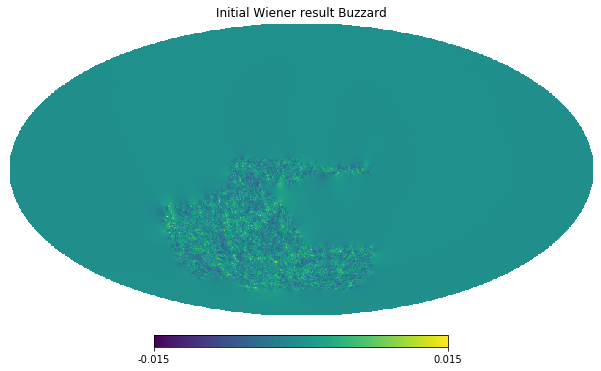

In [7]:
hp.mollview(kappa, min = -0.015,max=0.015, title='Initial Wiener result Buzzard')

In [9]:
hp.write_map('wiener_kappa_EB_230320.fits', kappa, overwrite=True)

In [10]:
old_kappa = hp.read_map('wiener_150120')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [11]:
des_buzzard = fits.open('../../dante/des/KS_1024.fits')

In [12]:
kappa_buzzard = des_buzzard[1].data['k_orig']
mask = np.where(des_buzzard[1].data['N_source']>0.5, 1., 0.)
# mask = np.where(kappa!=0., 1., 0.)

In [27]:
print(pearsonr(old_kappa*mask, kappa_buzzard*mask))
print(np.mean((old_kappa*mask - kappa_buzzard*mask)**2.))

(0.42681963475682017, 0.0)
4.740636934457916e-06


In [28]:
print(pearsonr(kappa*mask, kappa_buzzard*mask))
print(np.mean((kappa*mask - kappa_buzzard*mask)**2.))

(0.43639565420564724, 0.0)
4.548628450191478e-06


In [15]:
kappa_buzzard_smoothed = hp.smoothing(kappa_buzzard, sigma=np.deg2rad(0.1))
kappa_buzzard_smoothed = mask*kappa_buzzard_smoothed

Sigma is 6.000000 arcmin (0.001745 rad) 
-> fwhm is 14.128920 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


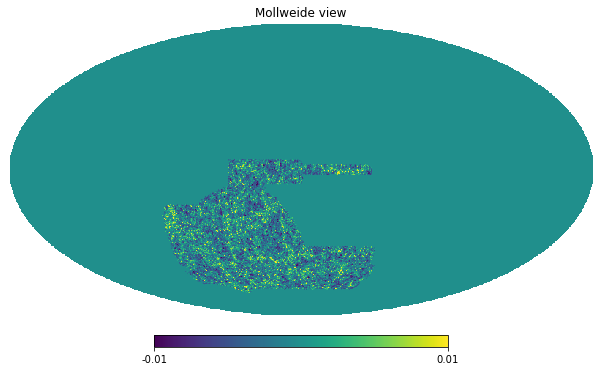

In [16]:
hp.mollview(kappa_buzzard_smoothed, min=-0.01,max=0.01)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projector.py:846: RuntimeWarning: invalid value encountered in greater
  mask = np.asarray(x) ** 2 + np.asarray(y) ** 2 > 1.0
/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:423: RuntimeWarning: invalid value encountered in greater
  w = np.where(d2 > threshold)[0]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


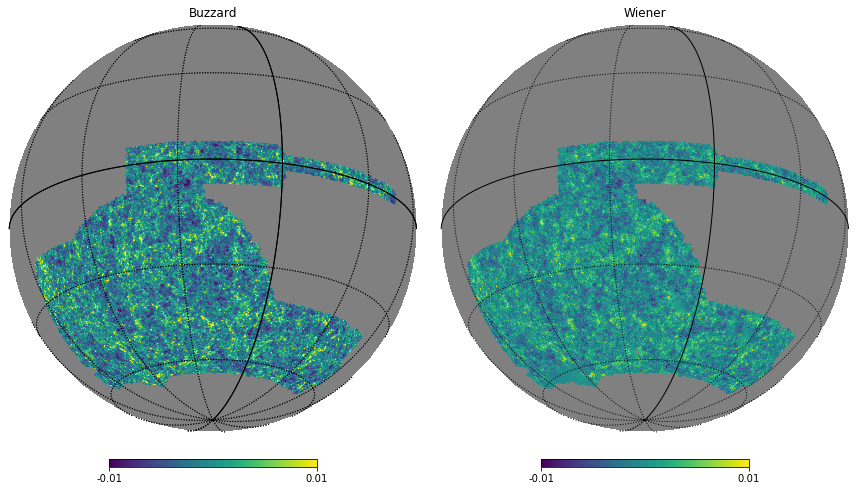

In [17]:
_ = plt.figure(figsize=(12,7))
_ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,1),
               title='Buzzard'), hp.graticule()

_ = hp.orthview(np.where(mask>0,kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,2),
               title='Wiener'), hp.graticule() ;

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


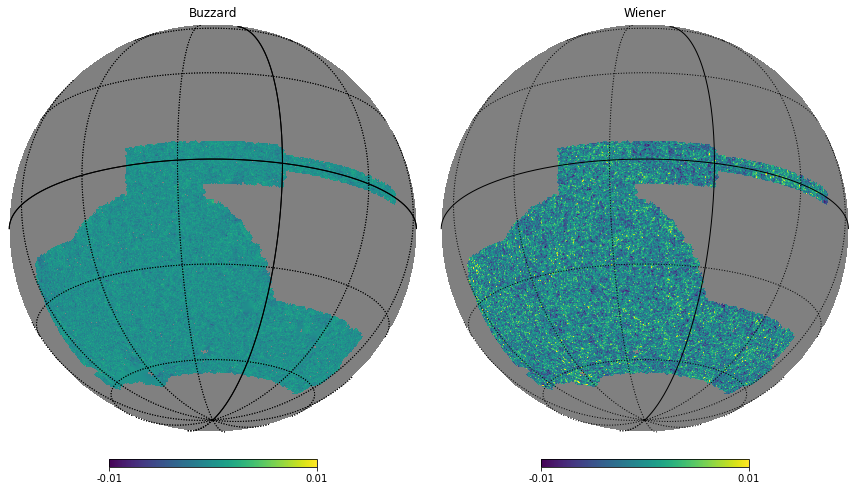

In [30]:
_ = plt.figure(figsize=(12,7))
_ = hp.orthview(np.where(mask>0,old_kappa - kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,1),
               title='Buzzard'), hp.graticule()

_ = hp.orthview(np.where(mask>0,kappa_buzzard_smoothed - kappa, hp.UNSEEN),
            min=-0.01,max=0.01, rot=(20,-20,0) , half_sky=True, sub=(1,2,2),
               title='Wiener'), hp.graticule()